# Assignment-13-KNN (K Nearest Neighbors) (Zoo)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split
from sklearn.metrics import classification_report

In [2]:
# Import Dataset
zoo=pd.read_csv('Database/Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo['animal name'].value_counts()

frog        2
rhea        1
ladybird    1
platypus    1
scorpion    1
           ..
lynx        1
flamingo    1
pike        1
fruitbat    1
porpoise    1
Name: animal name, Length: 100, dtype: int64

In [4]:
zoo['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [5]:
zoo.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [6]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [7]:
zoo2=zoo.iloc[:,1:]
zoo2

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [8]:
x=zoo2.iloc[:,0:16]
y=zoo2.iloc[:,-1]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=35)

## Train the K-Neighbors Classifier without Hyper-parameter Tuning

In [10]:
k=np.sqrt(zoo2.shape[0]/2)
k

7.106335201775948

In [11]:
knn=KNeighborsClassifier(n_neighbors=7)
model=knn.fit(x_train,y_train)

In [12]:
model.score(x_train,y_train)

0.8208955223880597

In [13]:
y_pred=model.predict(x_test)
y_pred

array([6, 1, 4, 1, 2, 1, 1, 6, 6, 1, 4, 2, 2, 1, 1, 1, 2, 2, 1, 4, 1, 6,
       4, 1, 5, 1, 4, 5, 4, 2, 2, 4, 6, 6], dtype=int64)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83        12
           2       1.00      1.00      1.00         7
           3       0.00      0.00      0.00         1
           4       0.43      1.00      0.60         3
           5       0.00      0.00      0.00         1
           6       0.67      1.00      0.80         4
           7       0.00      0.00      0.00         6

    accuracy                           0.71        34
   macro avg       0.42      0.55      0.46        34
weighted avg       0.62      0.71      0.65        34



C:\Users\Hitesh Koli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Train the K-Neighbors Classifier with Hyper-parameter Tuning

In [15]:
# Use GridsearchCV

In [16]:
knnc=KNeighborsClassifier()
param_grid=dict(n_neighbors=range(1,7))

In [17]:
model=GridSearchCV(knnc,param_grid,refit=True,verbose=3)

In [18]:
model.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.929, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=1.000, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.923, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.923, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.846, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.857, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ............

C:\Users\Hitesh Koli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... n_neighbors=3, score=0.857, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.929, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.923, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.846, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.846, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.857, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.929, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 7)}, verbose=3)

In [19]:
model.best_params_

{'n_neighbors': 1}

In [20]:
model.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [21]:
model.score(x_train,y_train)

1.0

In [22]:
# Model Predictions using test data
y_pred=model.predict(x_test)
y_pred

array([6, 5, 7, 1, 2, 1, 1, 6, 6, 1, 7, 2, 2, 1, 1, 1, 2, 2, 1, 4, 1, 7,
       1, 5, 7, 1, 4, 5, 4, 2, 2, 1, 7, 6], dtype=int64)

In [23]:
# print classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         7
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.33      1.00      0.50         1
           6       1.00      1.00      1.00         4
           7       1.00      0.83      0.91         6

    accuracy                           0.94        34
   macro avg       0.76      0.83      0.77        34
weighted avg       0.95      0.94      0.94        34



C:\Users\Hitesh Koli\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
## Visualizing the CV results

In [25]:
# choose k between 1 to 7
k_range = range(1, 7)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())

C:\Users\Hitesh Koli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Hitesh Koli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Hitesh Koli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Hitesh Koli\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Hitesh Koli

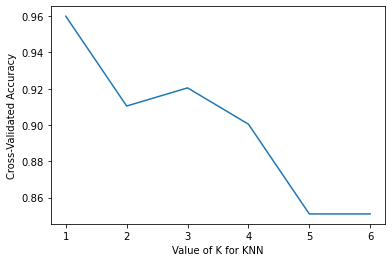

In [26]:
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Text(0, 0.5, 'Error Rate')

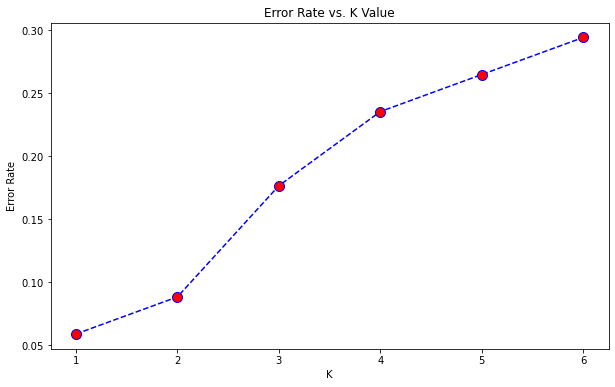

In [27]:
# plot Error Rate vs. K Value
plt.figure(figsize=(10,6))

error_rate = []
for i in range(1, 7):
      
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
  
plt.plot(range(1, 7), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')